In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.interpolate import make_interp_spline

In [55]:
x = [13, 14.5, 15.2, 16.4, 17.5, 18.0, 28.3, 30.4, 31.6, 16.0, 22.0, 19.0, 31.4, 34.5, 36.7, 37.7]
y = [35, 42, 24, 12, 10, 16, 64, 68, 62, 18, 44, 30, 62, 60, 64, 68]

if len(x) != len(y):
    raise ValueError('lens are not the same')
    
points = [(x[i], y[i]) for i in range(len(x))]
points = sorted(points, key = lambda x: x[0])
print(points)
x = np.array([points[i][0] for i in range(len(points))])
y = np.array([points[i][1] for i in range(len(points))])

[(13, 35), (14.5, 42), (15.2, 24), (16.0, 18), (16.4, 12), (17.5, 10), (18.0, 16), (19.0, 30), (22.0, 44), (28.3, 64), (30.4, 68), (31.4, 62), (31.6, 62), (34.5, 60), (36.7, 64), (37.7, 68)]


In [56]:
# Вычисление стандартной ошибки
standard_error = np.std(y) / np.sqrt(len(y))
# Приборная погрешность по оси х
inst_error = 0.1

# Значение t-критерия для доверительного интервала 95% и n-1 степеней свободы
t_value_y = stats.t.ppf(0.7, df=len(y) - 1)
t_value_x = stats.t.ppf(0.7, df = len(x) - 1)

# Погрешности
y_error = t_value_y * standard_error
x_error = t_value_x * inst_error 

# Интерполяция для гладкой кривой
x_new = np.linspace(x.min(), x.max(), 300)
spl = scipy.interpolate.UnivariateSpline(x, y)
y_smooth = spl(x_new)


In [57]:
plot_name = 'Зависимость анодного тока Ia от ускоряющего напряжения Uy'
x_label = 'Uy'
y_label = 'Ia'

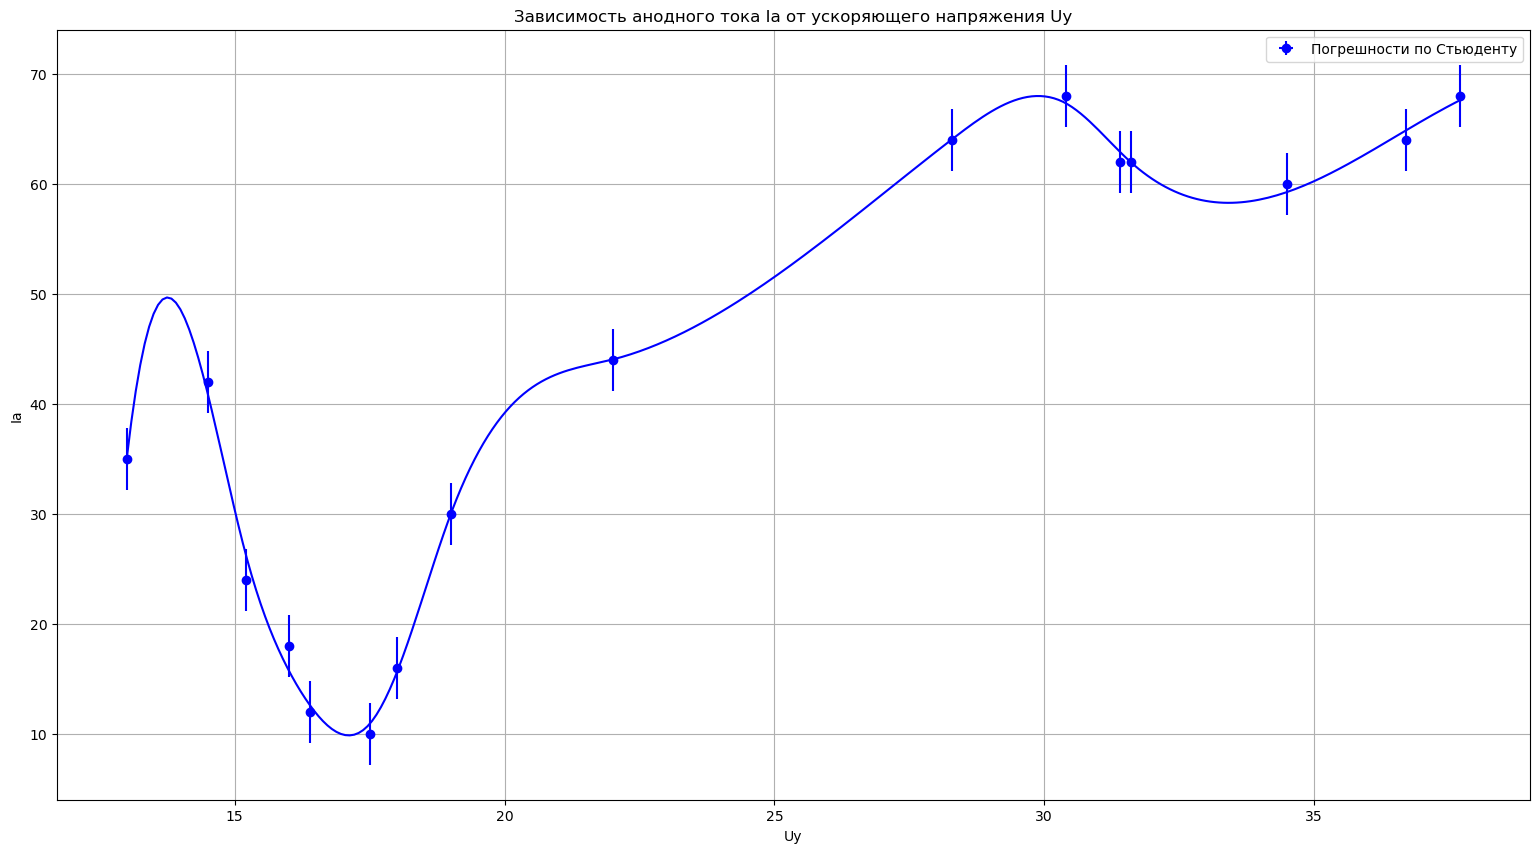

In [58]:
# Построение графика
plt.figure(figsize=(19, 10))
plt.plot(x_new, y_smooth, color = 'blue')
plt.errorbar(x, y, xerr = x_error, yerr=y_error, fmt='o', label='Погрешности по Стьюденту', color = 'blue')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_name)
plt.legend()
plt.grid(True)
plt.savefig("savedplots/lab5.4(He).png")
plt.show()